# Análisis y visualización de datos

Con el objetivo de ir entendiendo la naturaleza de los datos y su modo de presentación de grafos, vamos a ir analizando los distintos tipos de nodos con sus características.

Se puede comenzar por los siguientes puntos y luego agregar otros de interés:

1- Cantidad de Personas por Edades, aqui podemos analizar la distribución de las personas de todos los equipos de trabajo, otro análisis que se puede realizar es determinar el mismo análisis pero separado por sexo.

2- Existe otro factor importante para determinar el grado de conocimiento determinado por su Seniority (organizados como Senior, Semi-senior y Junior, siendo este último el de menos experiencia), aqui podemos determinar el nivel de expertís sobre las tecnologías a analizar y con ello determinar si los equipos están altamente especializados con perfiles senior o balancean su capacidad de trabajo con perfiles de menos experiencia.
Otro factor importante a analizar es el grado de participación de las mujeres ya que de esta manera se pueden aumentar la participación de mujeres en caso de que sea muy escasa.

3- Se correlacionan las edades de las personas con los años de experiencia, que nivel de participación se observa por sexo?

4- Cuales con los conocimientos que más poseen las personas?
Teniendo en cuenta que más adelante queremos equilibrar los conocimientos que tecnologias son las dominantes? , que nivel de participación se observa por sexo?

No olvidar responder a los puntos anteriores también con las visualizaciones apropiadas.

Tip: una visualización interesante para la frecuencia de palabras es la WordCloud.

In [ ]:
#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN
1,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0


,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,78031203cb9f8df3b96024f973e93dce-c81e728d9d4c2...
1,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,920da6fdbb28002170bd11ac31f931fa-c81e728d9d4c2...
2,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,d5f338d4f13a96698fda12514a76e4ad-c81e728d9d4c2...
3,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,bad0c7e4278c68df0eeadaaa9499f260-c81e728d9d4c2...
4,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,ff8fe587c76f4587b2fe3c6a4bd98d86-c81e728d9d4c2...


# Generamos estadísticas descriptivas del nodo.


In [ ]:
nodos.describe()

,n.age,n.experience
count,22.000000,14.000000
mean,20.681818,5.785714
std,16.980062,4.281958
min,0.000000,2.000000
25%,0.000000,3.000000
50%,26.000000,4.000000
75%,34.000000,6.750000
max,45.000000,16.000000


Analizamos los tipos de datos de cada campo inferidos por panda de los nodos

In [ ]:
dtypes = pd.DataFrame(personas.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
n.id,object
name_node_a,object
n.type,object
n.category,object
n.gender,object
n.age,float64
n.experience,float64


Analizamos los tipos de datos de cada campo inferidos por pandas de las relaciones



In [ ]:
# Generamos estadísticas descriptivas de las relaciones
relaciones.describe()

,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
count,197,197,197,197,197
unique,64,64,70,69,197
top,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,4016edfca46898bfdda98c19f492994f-c81e728d9d4c2...
freq,15,15,12,12,1


In [ ]:
dtypes = pd.DataFrame(relaciones.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
id_node_a,object
name_node_a,object
id_node_b,object
name_node_b,object
id_relationship,object


In [ ]:
# En el caso de querer trabajar solo con las personas se puede aplicar lo siguiente:
#Drop Nodos que no sean personas
personas = nodos[nodos["n.type"] == "person"]

#Display html
display(personas)

Campo,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
2,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,person,junior,female,23.0,3.0
3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0
4,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,person,senior,male,45.0,16.0
5,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0
6,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0
7,f9fdac801645d8b673ce785f01658a1e-c81e728d9d4c2...,Miguel,person,junior,male,24.0,2.0
8,822736b3fe21296f7d5c35a5e13d3ca3-c81e728d9d4c2...,Luciana,person,semi-senior,female,34.0,4.0
9,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,person,senior,male,41.0,12.0
18,79b60482d282d7fe48287ef484be2d31-a87ff679a2f3e...,Jonatan,person,senior,male,33.0,7.0
19,6bb28c0af81044a5f2bf023eb7f253e2-a87ff679a2f3e...,Lucas,person,senior,male,35.0,6.0


Vamos a necesitar conocer los tipos de datos en caso de querer trabajar con el dataset de personas

In [ ]:
personas.describe()

,n.age,n.experience
count,14.000000,14.000000
mean,32.500000,5.785714
std,7.219099,4.281958
min,23.000000,2.000000
25%,27.000000,3.000000
50%,33.500000,4.000000
75%,35.000000,6.750000
max,45.000000,16.000000


Para visualizar la distribución de las edades

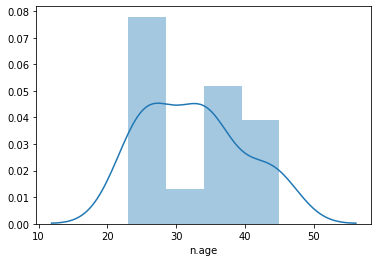

In [ ]:
import seaborn as sns
sns.distplot(personas['n.age'], kde=True);


Para calcular la probabilidad de los valores posibles sexo y seniority (category), una forma más sencilla con la operación value_counts de pandas.


In [ ]:
data = personas['n.gender'].value_counts(normalize=True).reset_index()
data

,index,n.gender
0,male,0.785714
1,female,0.214286


In [ ]:
data = personas['n.category'].value_counts(normalize=True).reset_index()
data

,index,n.category
0,senior,0.428571
1,semi-senior,0.357143
2,junior,0.214286


Para poder trabajar con ambos dataset necesitamos hacer lo siguiente

In [ ]:
resultante = nodos.merge(relaciones, left_on='n.id', right_on='id_node_a')

In [ ]:
display(resultante.head())

Campo,n.id,name_node_a_x,n.type,n.category,n.gender,n.age,n.experience,id_node_a,name_node_a_y,id_node_b,name_node_b,id_relationship
0,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,78031203cb9f8df3b96024f973e93dce-c81e728d9d4c2...
1,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2...,Marcela,920da6fdbb28002170bd11ac31f931fa-c81e728d9d4c2...
2,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,team,NaN,NaN,0.0,NaN,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,a5b6fc8ad5a79c2b57af4137389a7b6b-c81e728d9d4c2...,Marcelo,d5f338d4f13a96698fda12514a76e4ad-c81e728d9d4c2...
3,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,e726642e86168eacfeee3fa8c4da012e-c81e728d9d4c2...,Leonardo,bad0c7e4278c68df0eeadaaa9499f260-c81e728d9d4c2...
4,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,team,NaN,NaN,0.0,NaN,73cceb4a6d1f1fd7e91d38c2b906be15-c81e728d9d4c2...,Team2,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,ff8fe587c76f4587b2fe3c6a4bd98d86-c81e728d9d4c2...


Si queremos trabajar con las colunmas de padre e hijo de esta primer relación

In [ ]:
resultante[resultante['n.type']=='person'][['n.category','name_node_a_y','name_node_b']]

Campo,n.category,name_node_a_y,name_node_b
8,junior,Marcela,Developer
9,junior,Marcela,windows
10,junior,Marcela,Linux
11,junior,Marcela,MySQL
12,junior,Marcela,phyton
...,...,...,...
118,senior,Martin,Data Scientist
119,senior,Martin,Vertica
120,senior,Martin,SQL Server
121,senior,Martin,phyton


# Análisis exploratorio y curación de datos
En ésta entrega se comenzará a preparar el dataset para los prácticos siguientes. Algunos puntos de aquí ya han sido cubiertos en la entrega anterior para hacer el análisis. Otros pueden tener un tratamiento especial según nuestro enfoque de NLP.

## Listado de puntos a cubrir en análisis y curación:

a. Asegurarse de tener ids/claves únicas
b. Chequear que no haya datos duplicados
c. No usar caracteres especiales en las etiquetas de variables
d. Verificar que no haya problemas de codificación/encoding
e. Verificar la consistencia de las variables
f. Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?
g. Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes
h. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.
Con los puntos anteriores ya se puede preparar los datasets que vamos a usar más adelante.

DATASET1- Preparar un dataset para usar modelos supervisados. Éste debe incluir las personas, los conocimientos, los perfiles (skills) opcional (los teams), que son las que se van a usar para en armar una regresión lineal sobre las personas con los años de experiencias vs el ranking que posee de sus conocimientos.

DATASET2- Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir dentificar los perfiles que puede poseer cada persona, en base a ciertas personas ya clasificadas, por lo que en éste caso debe filtrar éste subconjunto de perfiles (Skills).

Por último, guarde los datasets en un formato conveniente para usar después. Importante: guardarlos en nuevos archivos para no sobreescribir los datos crudos u originales
